# Pré-processamento de Dados - Dataset de Diabetes
## Tech Challenge IADT - Fase 1

### Grupo
- Hiago Marques Rubio - RM
- Mylena Ferreira Lacerda - RM

---

## Objetivo

Este notebook realiza o pré-processamento completo do dataset de diabetes, incluindo:

1. **Limpeza de dados**: Tratamento de valores ausentes e inconsistências
2. **Transformação de variáveis categóricas**: One-Hot Encoding e Label Encoding
3. **Normalização de variáveis numéricas**: StandardScaler e MinMaxScaler
4. **Análise de correlação**: Identificação de multicolinearidade e features importantes
5. **Preparação para modelagem**: Train/Test Split

Dataset: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset)

## 1. Importação de Bibliotecas

In [ ]:
# Import das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas importadas com sucesso!")

## 2. Carregamento dos Dados

In [ ]:
# Carregar dataset
df = pd.read_csv('../data/diabetes_dataset.csv')

print("=" * 80)
print("CARREGAMENTO DOS DADOS")
print("=" * 80)
print(f"\nDataset carregado com sucesso!")
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\nPrimeiras 5 linhas:")
df.head()

In [3]:
# Definir colunas por tipo
categorical_cols = [
    'gender', 'ethnicity', 'education_level', 'income_level',
    'employment_status', 'smoking_status', 'diabetes_stage'
]

numerical_cols = [
    'age', 'bmi', 'glucose_fasting', 'glucose_postprandial',
    'hba1c', 'insulin_level', 'diabetes_risk_score',
    'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
    'triglycerides', 'systolic_bp', 'diastolic_bp',
    'physical_activity_minutes_per_week', 'sleep_hours_per_day',
    'diet_score', 'alcohol_consumption_per_week', 'screen_time_hours_per_day',
    'family_history_diabetes', 'hypertension_history', 'cardiovascular_history',
    'waist_to_hip_ratio', 'heart_rate'
]

target_col = 'diagnosed_diabetes'

print(f"Variáveis Categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"\nVariáveis Numéricas ({len(numerical_cols)}): {numerical_cols}")
print(f"\nVariável Alvo: {target_col}")

Variáveis Categóricas (7): ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 'smoking_status', 'diabetes_stage']

Variáveis Numéricas (23): ['age', 'bmi', 'glucose_fasting', 'glucose_postprandial', 'hba1c', 'insulin_level', 'diabetes_risk_score', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'systolic_bp', 'diastolic_bp', 'physical_activity_minutes_per_week', 'sleep_hours_per_day', 'diet_score', 'alcohol_consumption_per_week', 'screen_time_hours_per_day', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'waist_to_hip_ratio', 'heart_rate']

Variável Alvo: diagnosed_diabetes


## 3. Análise de Qualidade dos Dados

### 3.1 Valores Ausentes

In [4]:
print("=" * 80)
print("ANÁLISE DE VALORES AUSENTES")
print("=" * 80)

missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing_values.index,
    'Valores Ausentes': missing_values.values,
    'Percentual (%)': missing_pct.values
})
missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)

if len(missing_df) > 0:
    print("\nColunas com valores ausentes:")
    display(missing_df)
    print(f"\nTotal de colunas com valores ausentes: {len(missing_df)}")
else:
    print("\nNenhum valor ausente encontrado!")

ANÁLISE DE VALORES AUSENTES

Nenhum valor ausente encontrado!


### 3.2 Duplicatas

In [5]:
print("=" * 80)
print("ANÁLISE DE DUPLICATAS")
print("=" * 80)

duplicates = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicates}")
if duplicates > 0:
    print(f"Percentual de duplicatas: {(duplicates/len(df))*100:.2f}%")
else:
    print("Nenhuma duplicata encontrada!")

ANÁLISE DE DUPLICATAS

Número de linhas duplicadas: 0
Nenhuma duplicata encontrada!


### 3.3 Tipos de Dados

In [6]:
print("=" * 80)
print("TIPOS DE DADOS")
print("=" * 80)
print("\n")
df.dtypes

TIPOS DE DADOS




age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                   

### 3.4 Estatísticas Descritivas

In [7]:
print("=" * 80)
print("ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS")
print("=" * 80)
print("\n")
df[numerical_cols].describe()

ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS




,age,bmi,glucose_fasting,glucose_postprandial,hba1c,insulin_level,diabetes_risk_score,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,systolic_bp,diastolic_bp,physical_activity_minutes_per_week,sleep_hours_per_day,diet_score,alcohol_consumption_per_week,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,waist_to_hip_ratio,heart_rate
count,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,25.612653,111.11712,160.035050,6.520776,9.061242,30.222362,185.978110,54.042790,103.000430,121.462650,115.799610,75.23249,118.911640,6.997818,5.994787,2.003670,5.996468,0.219410,0.250800,0.079200,0.856078,69.632870
std,15.60460,3.586705,13.59561,30.935472,0.813921,4.954060,9.061505,32.013005,10.267374,33.390256,43.372619,14.284073,8.20425,84.409662,1.094622,1.780954,1.417779,2.468406,0.413849,0.433476,0.270052,0.046837,8.371954
min,18.00000,15.000000,60.00000,70.000000,4.000000,2.000000,2.700000,100.000000,20.000000,50.000000,30.000000,90.000000,50.00000,0.000000,3.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.670000,40.000000
25%,39.00000,23.200000,102.00000,139.000000,5.970000,5.090000,23.800000,164.000000,47.000000,78.000000,91.000000,106.000000,70.00000,57.000000,6.300000,4.800000,1.000000,4.300000,0.000000,0.000000,0.000000,0.820000,64.000000
50%,50.00000,25.600000,111.00000,160.000000,6.520000,8.790000,29.000000,186.000000,54.000000,102.000000,121.000000,116.000000,75.00000,100.000000,7.000000,6.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.860000,70.000000
75%,61.00000,28.000000,120.00000,181.000000,7.070000,12.450000,35.600000,208.000000,61.000000,126.000000,151.000000,125.000000,81.00000,160.000000,7.700000,7.200000,3.000000,7.700000,0.000000,1.000000,0.000000,0.890000,75.000000
max,90.00000,39.200000,172.00000,287.000000,9.800000,32.220000,67.200000,318.000000,98.000000,263.000000,344.000000,179.000000,110.00000,833.000000,10.000000,10.000000,10.000000,16.800000,1.000000,1.000000,1.000000,1.060000,105.000000


### 3.5 Valores Únicos de Variáveis Categóricas

In [8]:
print("=" * 80)
print("VALORES ÚNICOS - VARIÁVEIS CATEGÓRICAS")
print("=" * 80)
print("\n")

for col in categorical_cols:
    unique_vals = df[col].nunique()
    print(f"{col:25s}: {unique_vals} valores únicos -> {df[col].unique()}")

VALORES ÚNICOS - VARIÁVEIS CATEGÓRICAS


gender                   : 3 valores únicos -> ['Male' 'Female' 'Other']
ethnicity                : 5 valores únicos -> ['Asian' 'White' 'Hispanic' 'Black' 'Other']
education_level          : 4 valores únicos -> ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
income_level             : 5 valores únicos -> ['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']
employment_status        : 4 valores únicos -> ['Employed' 'Unemployed' 'Retired' 'Student']
smoking_status           : 3 valores únicos -> ['Never' 'Former' 'Current']
diabetes_stage           : 5 valores únicos -> ['Type 2' 'No Diabetes' 'Pre-Diabetes' 'Gestational' 'Type 1']


### 3.6 Distribuição da Variável Alvo

In [ ]:
print("=" * 80)
print("DISTRIBUIÇÃO DA VARIÁVEL ALVO (diagnosed_diabetes)")
print("=" * 80)

target_dist = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

print(f"\nClasse 0 (Sem diabetes): {target_dist[0]} ({target_pct[0]:.2f}%)")
print(f"Classe 1 (Com diabetes): {target_dist[1]} ({target_pct[1]:.2f}%)")

balance_ratio = min(target_dist) / max(target_dist)
print(f"\nBalanceamento: {balance_ratio:.2f}")
if balance_ratio < 0.5:
    print("Dataset desbalanceado. Considerar técnicas de balanceamento.")
else:
    print("Dataset relativamente balanceado.")

# Visualização
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de barras
target_dist.plot(kind='bar', ax=ax[0], color=['steelblue', 'coral'])
ax[0].set_title('Distribuição da Variável Alvo', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Diagnosed Diabetes')
ax[0].set_ylabel('Contagem')
ax[0].set_xticklabels(['Sem Diabetes (0)', 'Com Diabetes (1)'], rotation=0)
ax[0].grid(axis='y', alpha=0.3)

# Gráfico de pizza
ax[1].pie(target_dist, labels=['Sem Diabetes (0)', 'Com Diabetes (1)'], 
          autopct='%1.1f%%', colors=['steelblue', 'coral'], startangle=90)
ax[1].set_title('Proporção de Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Limpeza dos Dados

In [ ]:
print("=" * 80)
print("LIMPEZA DOS DADOS")
print("=" * 80)

# Fazer cópia para não modificar dados originais
df_processed = df.copy()

# 1. Remover duplicatas
print("\n1. Removendo duplicatas...")
initial_shape = df_processed.shape[0]
df_processed = df_processed.drop_duplicates()
final_shape = df_processed.shape[0]
print(f"   Linhas removidas: {initial_shape - final_shape}")

# 2. Tratar valores ausentes
print("\n2. Tratando valores ausentes...")
missing_before = df_processed.isnull().sum().sum()

if missing_before > 0:
    # Para numéricas: preencher com mediana
    for col in numerical_cols:
        if df_processed[col].isnull().any():
            median_val = df_processed[col].median()
            df_processed[col].fillna(median_val, inplace=True)
            print(f"   - {col}: preenchido com mediana ({median_val:.2f})")
    
    # Para categóricas: preencher com moda
    for col in categorical_cols:
        if df_processed[col].isnull().any():
            mode_val = df_processed[col].mode()[0]
            df_processed[col].fillna(mode_val, inplace=True)
            print(f"   - {col}: preenchido com moda ({mode_val})")
else:
    print("   Nenhum valor ausente encontrado!")

missing_after = df_processed.isnull().sum().sum()
print(f"   Valores ausentes antes: {missing_before}")
print(f"   Valores ausentes depois: {missing_after}")

print("\nLimpeza concluída!")
print(f"Dataset limpo: {df_processed.shape[0]} linhas x {df_processed.shape[1]} colunas")

## 5. Encoding de Variáveis Categóricas

### 5.1 One-Hot Encoding

One-Hot Encoding cria uma coluna binária (0 ou 1) para cada categoria.

**Vantagens:**
- Não assume ordem entre categorias
- Funciona bem com modelos lineares
- Evita viés de ordenação

**Desvantagens:**
- Aumenta número de features (curse of dimensionality)
- Pode causar multicolinearidade

In [ ]:
print("=" * 80)
print("ENCODING DE VARIÁVEIS CATEGÓRICAS - ONE-HOT ENCODING")
print("=" * 80)

# Remover diabetes_stage (não usar no modelo preditivo - vazamento de dados)
categorical_for_encoding = [col for col in categorical_cols if col != 'diabetes_stage']

print(f"\nVariáveis para encoding: {categorical_for_encoding}")
print(f"\nDimensões antes do encoding: {df_processed.shape}")

# Aplicar one-hot encoding
df_processed = pd.get_dummies(
    df_processed,
    columns=categorical_for_encoding,
    prefix=categorical_for_encoding,
    drop_first=True  # Evitar multicolinearidade (dummy variable trap)
)

print(f"Dimensões após encoding: {df_processed.shape}")
print(f"\nOne-Hot Encoding concluído!")
print(f"Número de features criadas: {df_processed.shape[1] - df.shape[1]}")

# Mostrar colunas criadas
new_cols = [col for col in df_processed.columns if any(cat in col for cat in categorical_for_encoding)]
print(f"\nPrimeiras 10 colunas criadas:")
for col in new_cols[:10]:
    print(f"  - {col}")
if len(new_cols) > 10:
    print(f"  ... e mais {len(new_cols) - 10} colunas")

### 5.2 Visualização das Novas Features

In [12]:
print("Primeiras 5 linhas do dataset após encoding:")
df_processed.head()

Primeiras 5 linhas do dataset após encoding:


,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes,gender_Male,gender_Other,ethnicity_Black,ethnicity_Hispanic,ethnicity_Other,ethnicity_White,education_level_Highschool,education_level_No formal,education_level_Postgraduate,income_level_Low,income_level_Lower-Middle,income_level_Middle,income_level_Upper-Middle,employment_status_Retired,employment_status_Student,employment_status_Unemployed,smoking_status_Former,smoking_status_Never
0,58,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
1,48,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False
2,60,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,True
3,74,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True
4,46,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,23.5,Type 2,1,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True


## 6. Normalização de Variáveis Numéricas

### 6.1 StandardScaler (Padronização)

Transforma dados para ter **média = 0** e **desvio padrão = 1**

**Fórmula:** `z = (x - μ) / σ`

**Quando usar:**
- Modelos lineares (Regressão Logística, SVM)
- Algoritmos baseados em distância (KNN, K-Means)
- Redes neurais
- Quando dados têm distribuição normal

**Vantagens:**
- Não altera a forma da distribuição
- Mantém informação de outliers
- Sensível a outliers (pode ser vantagem ou desvantagem)

In [ ]:
print("=" * 80)
print("NORMALIZAÇÃO DE VARIÁVEIS NUMÉRICAS - STANDARD SCALER")
print("=" * 80)

# Colunas numéricas que ainda existem no dataframe
numerical_to_scale = [col for col in numerical_cols if col in df_processed.columns]

print(f"\nVariáveis a serem normalizadas: {len(numerical_to_scale)}")
print(f"\nEstatísticas ANTES da normalização:")
print(df_processed[numerical_to_scale].describe().round(3))

# Aplicar StandardScaler
scaler = StandardScaler()
df_processed[numerical_to_scale] = scaler.fit_transform(df_processed[numerical_to_scale])

print(f"\nNormalização concluída!")
print(f"\nEstatísticas DEPOIS da normalização:")
print(df_processed[numerical_to_scale].describe().round(3))

print("\nObserve que:")
print("  - Média de todas as variáveis ~ 0")
print("  - Desvio padrão de todas as variáveis ~ 1")

### 6.2 Visualização da Normalização

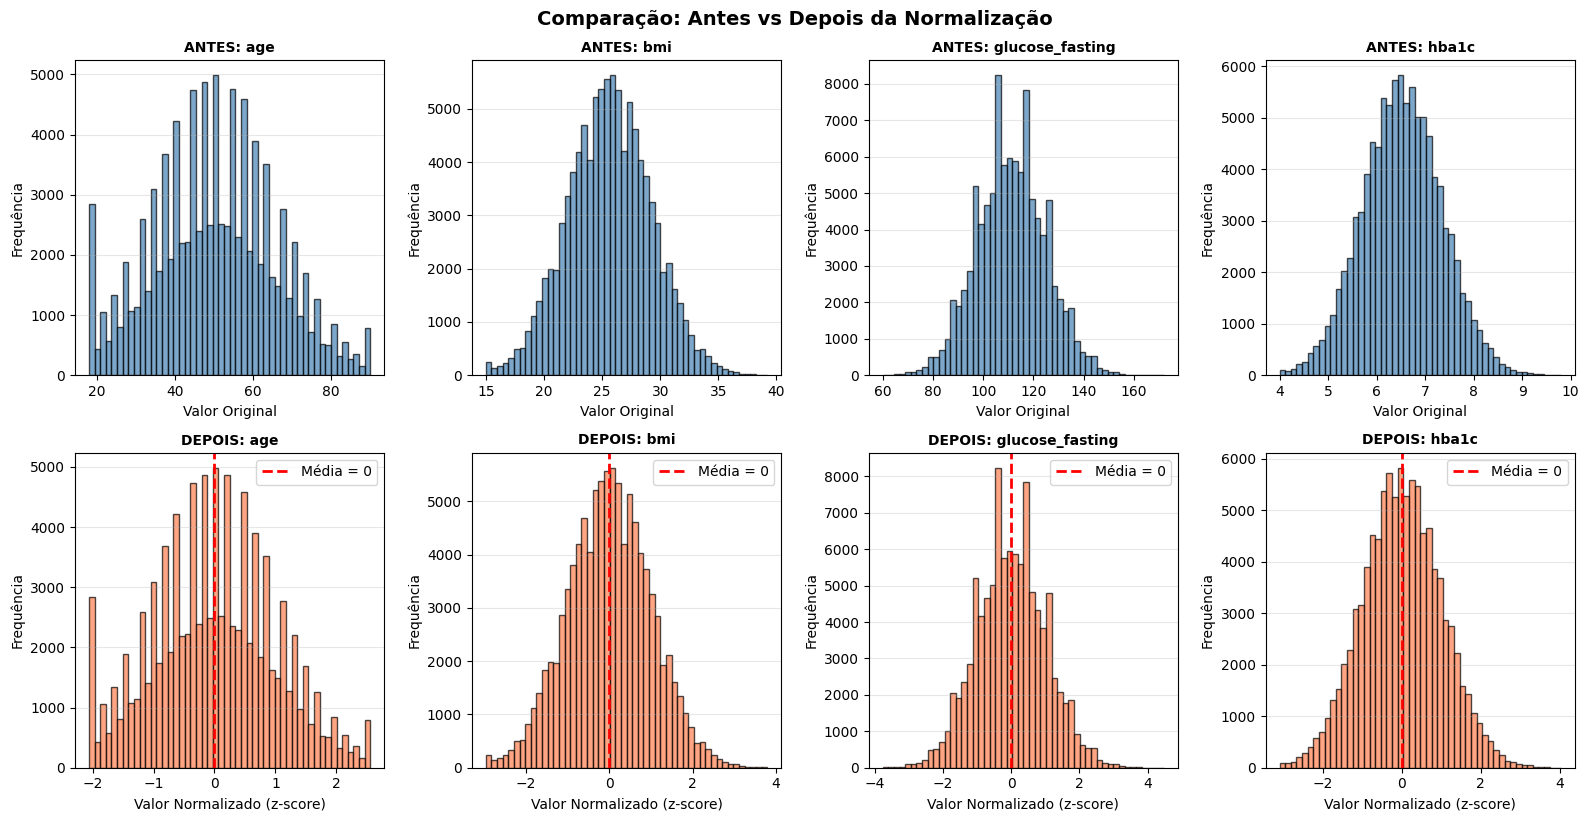


Observe que:
  - A FORMA da distribuição se mantém (StandardScaler preserva a distribuição)
  - Os valores estão centrados em 0 (linha vermelha)
  - A maioria dos valores está entre -3 e +3 (3 desvios padrão)


In [14]:
# Comparar algumas variáveis antes e depois da normalização
# Vamos recarregar os dados originais para comparação
df_original = pd.read_csv('../data/diabetes_dataset.csv')

# Selecionar 4 variáveis para visualização
vars_to_plot = ['age', 'bmi', 'glucose_fasting', 'hba1c']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, var in enumerate(vars_to_plot):
    # Antes da normalização
    axes[0, idx].hist(df_original[var], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'ANTES: {var}', fontsize=10, fontweight='bold')
    axes[0, idx].set_xlabel('Valor Original')
    axes[0, idx].set_ylabel('Frequência')
    axes[0, idx].grid(axis='y', alpha=0.3)
    
    # Depois da normalização
    axes[1, idx].hist(df_processed[var], bins=50, color='coral', edgecolor='black', alpha=0.7)
    axes[1, idx].set_title(f'DEPOIS: {var}', fontsize=10, fontweight='bold')
    axes[1, idx].set_xlabel('Valor Normalizado (z-score)')
    axes[1, idx].set_ylabel('Frequência')
    axes[1, idx].grid(axis='y', alpha=0.3)
    axes[1, idx].axvline(0, color='red', linestyle='--', linewidth=2, label='Média = 0')
    axes[1, idx].legend()

plt.tight_layout()
plt.suptitle('Comparação: Antes vs Depois da Normalização', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\nObserve que:")
print("  - A FORMA da distribuição se mantém (StandardScaler preserva a distribuição)")
print("  - Os valores estão centrados em 0 (linha vermelha)")
print("  - A maioria dos valores está entre -3 e +3 (3 desvios padrão)")

## 7. Análise de Correlação

### 7.1 Matriz de Correlação

In [15]:
print("=" * 80)
print("ANÁLISE DE CORRELAÇÃO")
print("=" * 80)

# Selecionar apenas colunas numéricas
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nNúmero de variáveis numéricas: {len(numeric_cols)}")

# Calcular matriz de correlação
correlation_matrix = df_processed[numeric_cols].corr()

print(f"Dimensões da matriz de correlação: {correlation_matrix.shape}")
print("\nGerando heatmap...")

ANÁLISE DE CORRELAÇÃO

Número de variáveis numéricas: 24
Dimensões da matriz de correlação: (24, 24)

Gerando heatmap...


Heatmap completo salvo: ../data/correlation_matrix_full.png


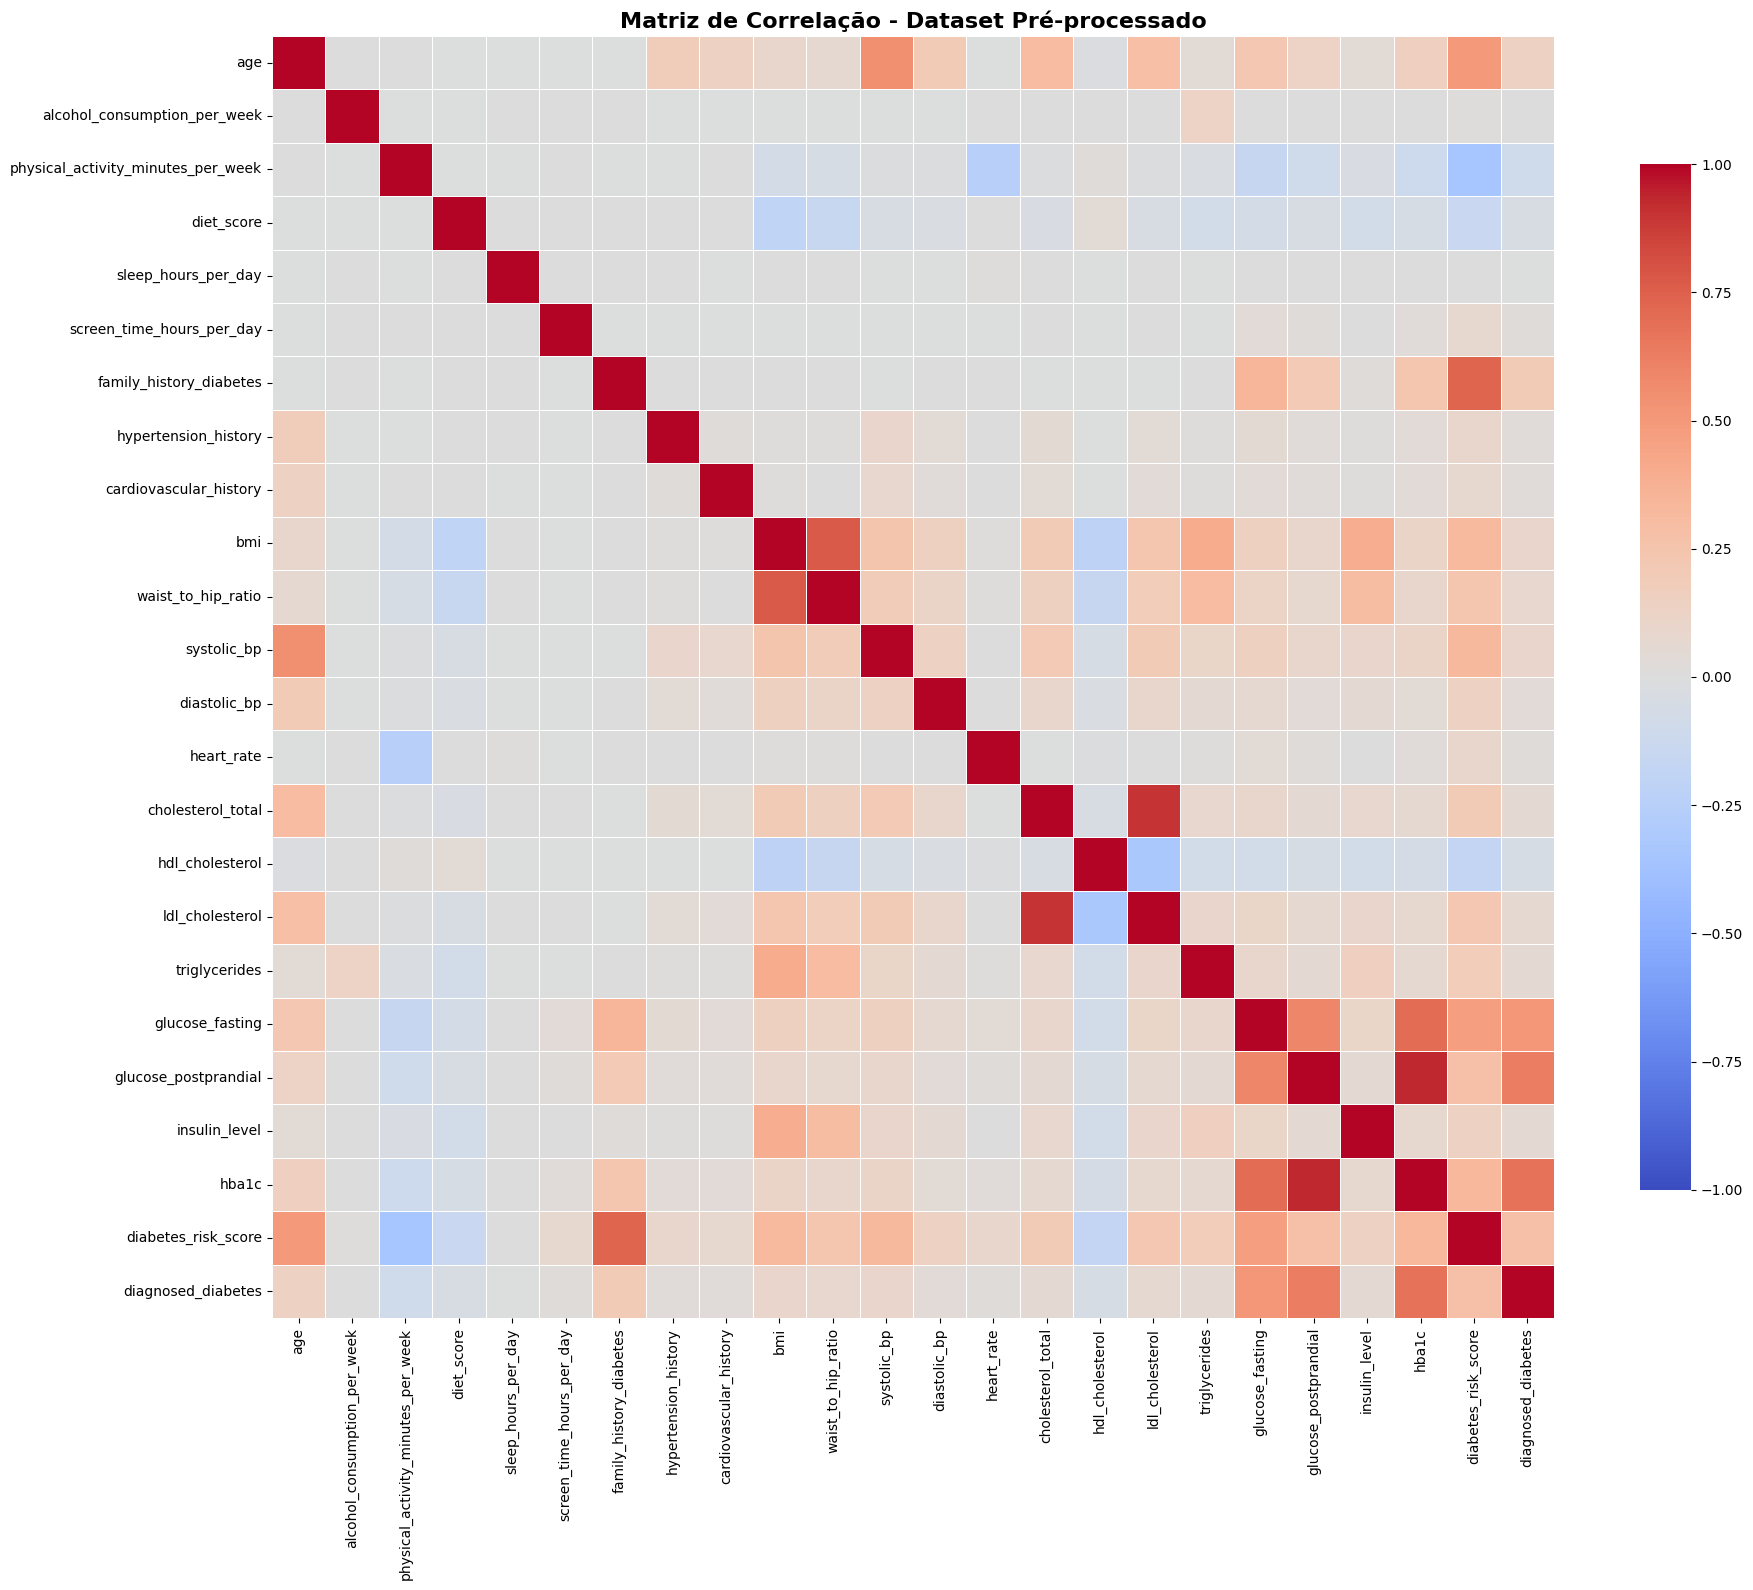

In [16]:
# Visualização: Heatmap da matriz de correlação completa
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix,
            annot=False,  # Não mostrar valores (muitas colunas)
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Dataset Pré-processado', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../data/correlation_matrix_full.png', dpi=300, bbox_inches='tight')
print("Heatmap completo salvo: ../data/correlation_matrix_full.png")
plt.show()

### 7.2 Identificação de Correlações Fortes (Multicolinearidade)

In [ ]:
print("=" * 80)
print("IDENTIFICAÇÃO DE CORRELAÇÕES FORTES (|r| >= 0.7)")
print("=" * 80)

threshold = 0.7
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) >= threshold:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))

# Ordenar por correlação absoluta
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

if strong_correlations:
    print(f"\nEncontradas {len(strong_correlations)} pares com correlação forte:\n")
    
    # Criar dataframe para melhor visualização
    strong_corr_df = pd.DataFrame(strong_correlations, columns=['Variável 1', 'Variável 2', 'Correlação'])
    print(strong_corr_df.to_string(index=False))
    
    print("\nMulticolinearidade detectada!")
    print("   Considerar:")
    print("   - Remover uma das variáveis correlacionadas")
    print("   - Usar PCA (Principal Component Analysis)")
    print("   - Usar regularização (Ridge/Lasso)")
else:
    print(f"\nNenhuma correlação forte (|r| >= {threshold}) detectada.")
    print("Boa independência entre features!")

### 7.3 Correlação com Variável Alvo

In [18]:
print("=" * 80)
print("CORRELAÇÃO COM VARIÁVEL ALVO (diagnosed_diabetes)")
print("=" * 80)

if target_col in numeric_cols:
    target_corr = correlation_matrix[target_col].sort_values(ascending=False)
    
    print(f"\nTop 20 variáveis mais correlacionadas com {target_col}:\n")
    
    # Criar dataframe para visualização
    target_corr_df = pd.DataFrame({
        'Variável': target_corr.index[1:21],  # Pular a própria variável
        'Correlação': target_corr.values[1:21]
    })
    
    target_corr_df['Força'] = target_corr_df['Correlação'].apply(
        lambda x: 'Forte' if abs(x) >= 0.7 else 'Moderada' if abs(x) >= 0.5 else 'Fraca' if abs(x) >= 0.3 else 'Muito fraca'
    )
    target_corr_df['Direção'] = target_corr_df['Correlação'].apply(lambda x: 'Positiva' if x > 0 else 'Negativa')
    
    print(target_corr_df.to_string(index=False))
else:
    print("\nVariável alvo não encontrada nas colunas numéricas.")

CORRELAÇÃO COM VARIÁVEL ALVO (diagnosed_diabetes)

Top 20 variáveis mais correlacionadas com diagnosed_diabetes:

                    Variável  Correlação       Força  Direção
                       hba1c    0.679397    Moderada Positiva
        glucose_postprandial    0.629832    Moderada Positiva
             glucose_fasting    0.510919    Moderada Positiva
         diabetes_risk_score    0.277300 Muito fraca Positiva
     family_history_diabetes    0.197926 Muito fraca Positiva
                         age    0.137713 Muito fraca Positiva
                         bmi    0.097057 Muito fraca Positiva
                 systolic_bp    0.095481 Muito fraca Positiva
          waist_to_hip_ratio    0.078918 Muito fraca Positiva
             ldl_cholesterol    0.067475 Muito fraca Positiva
           cholesterol_total    0.058173 Muito fraca Positiva
               insulin_level    0.057715 Muito fraca Positiva
               triglycerides    0.056230 Muito fraca Positiva
                di

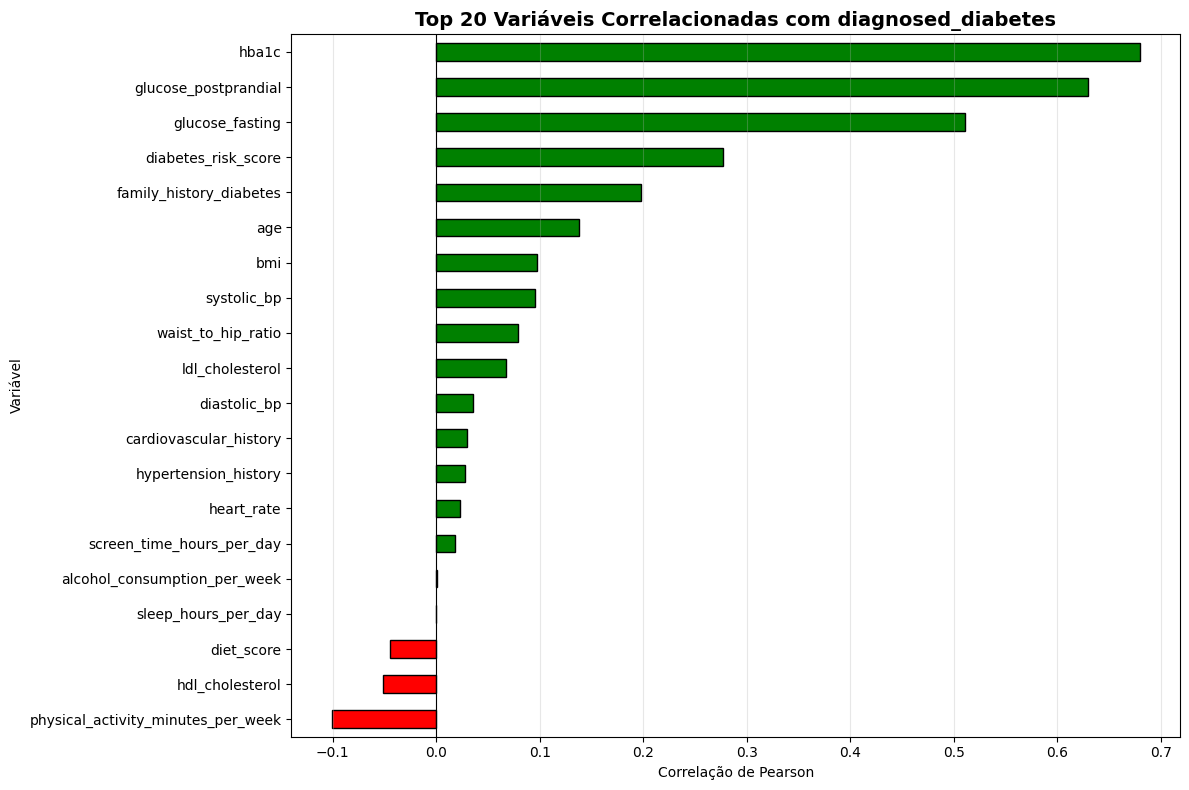


Interpretação:
  - Barras VERDES: Correlação positiva (↑ variável → ↑ diabetes)
  - Barras VERMELHAS: Correlação negativa (↑ variável → ↓ diabetes)


In [19]:
# Visualização das correlações com variável alvo
if target_col in numeric_cols:
    # Top 15 correlações positivas e negativas
    target_corr_sorted = correlation_matrix[target_col].drop(target_col).sort_values()
    top_features = pd.concat([
        target_corr_sorted.head(10),  # Top 10 negativas
        target_corr_sorted.tail(10)   # Top 10 positivas
    ])
    
    plt.figure(figsize=(12, 8))
    colors = ['red' if x < 0 else 'green' for x in top_features.values]
    top_features.plot(kind='barh', color=colors, edgecolor='black')
    plt.title('Top 20 Variáveis Correlacionadas com diagnosed_diabetes', fontsize=14, fontweight='bold')
    plt.xlabel('Correlação de Pearson')
    plt.ylabel('Variável')
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nInterpretação:")
    print("  - Barras VERDES: Correlação positiva (↑ variável → ↑ diabetes)")
    print("  - Barras VERMELHAS: Correlação negativa (↑ variável → ↓ diabetes)")

### 7.4 VIF (Variance Inflation Factor)

In [ ]:
print("=" * 80)
print("VIF - VARIANCE INFLATION FACTOR")
print("=" * 80)
print("\nVIF mede o quanto a variância de um coeficiente aumenta devido à multicolinearidade")
print("Interpretação:")
print("  - VIF < 5: Sem multicolinearidade")
print("  - 5 <= VIF < 10: Multicolinearidade moderada")
print("  - VIF >= 10: Multicolinearidade severa (considerar remover variável)")

# Selecionar features numéricas (excluir target e diabetes_stage)
feature_cols = [col for col in numeric_cols if col not in [target_col, 'diabetes_stage']]

# Calcular VIF apenas para amostra das variáveis originais (muito lento para todas)
# Vamos calcular para as variáveis numéricas originais
vif_cols = [col for col in numerical_cols if col in df_processed.columns and col != target_col]

if len(vif_cols) <= 30:
    print(f"\nCalculando VIF para {len(vif_cols)} variáveis...")
    print("(Isso pode levar alguns segundos...)\n")
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = vif_cols
    vif_data["VIF"] = [variance_inflation_factor(df_processed[vif_cols].values, i) 
                       for i in range(len(vif_cols))]
    vif_data = vif_data.sort_values('VIF', ascending=False)
    
    print("Resultados do VIF:")
    print(vif_data.to_string(index=False))
    
    high_vif = vif_data[vif_data['VIF'] > 10]
    if len(high_vif) > 0:
        print(f"\n{len(high_vif)} variáveis com VIF > 10 (multicolinearidade severa)")
        print("\nVariáveis problemáticas:")
        print(high_vif.to_string(index=False))
    else:
        print("\nNenhuma variável com VIF > 10")
else:
    print(f"\nDataset com {len(feature_cols)} features após encoding")
    print("   VIF não calculado para todas (computacionalmente caro)")
    print("   Sugestão: Calcular VIF após seleção de features")

## 8. Preparação para Modelagem

### 8.1 Divisão Treino/Teste

In [ ]:
print("=" * 80)
print("PREPARANDO DIVISÃO TREINO/TESTE")
print("=" * 80)

# Separar features e target
X = df_processed.drop(columns=[target_col, 'diabetes_stage'], errors='ignore')
y = df_processed[target_col]

print(f"\nFeatures (X): {X.shape[0]} linhas x {X.shape[1]} colunas")
print(f"Target (y): {y.shape[0]} exemplos")

# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Manter proporção de classes
)

print(f"\nDivisão realizada!")
print(f"\nConjunto de Treino (80%):")
print(f"  - X_train: {X_train.shape[0]} linhas x {X_train.shape[1]} features")
print(f"  - y_train: {y_train.shape[0]} exemplos")
print(f"  - Distribuição: {dict(y_train.value_counts())}")

print(f"\nConjunto de Teste (20%):")
print(f"  - X_test: {X_test.shape[0]} linhas x {X_test.shape[1]} features")
print(f"  - y_test: {y_test.shape[0]} exemplos")
print(f"  - Distribuição: {dict(y_test.value_counts())}")

### 8.2 Verificação do Balanceamento

In [ ]:
# Visualizar balanceamento treino vs teste
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Treino
y_train.value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Distribuição - Conjunto de Treino', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Diagnosed Diabetes')
axes[0].set_ylabel('Contagem')
axes[0].set_xticklabels(['Sem Diabetes (0)', 'Com Diabetes (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Teste
y_test.value_counts().plot(kind='bar', ax=axes[1], color=['steelblue', 'coral'])
axes[1].set_title('Distribuição - Conjunto de Teste', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Diagnosed Diabetes')
axes[1].set_ylabel('Contagem')
axes[1].set_xticklabels(['Sem Diabetes (0)', 'Com Diabetes (1)'], rotation=0)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular proporções
train_ratio = y_train.value_counts(normalize=True)
test_ratio = y_test.value_counts(normalize=True)

print("\nProporções:")
print(f"  Treino: Classe 0 = {train_ratio[0]:.2%} | Classe 1 = {train_ratio[1]:.2%}")
print(f"  Teste:  Classe 0 = {test_ratio[0]:.2%} | Classe 1 = {test_ratio[1]:.2%}")
print("\nStratify funcionou! Proporções mantidas entre treino e teste.")

## 9. Salvamento dos Dados Processados

In [ ]:
print("=" * 80)
print("SALVANDO DADOS PROCESSADOS")
print("=" * 80)

# Salvar dataset completo processado
df_processed.to_csv('../data/../data/diabetes_dataset_processed.csv', index=False)
print(f"\nDataset processado salvo: ../data/diabetes_dataset_processed.csv")
print(f"   Dimensões: {df_processed.shape[0]} linhas x {df_processed.shape[1]} colunas")

# Salvar conjuntos de treino e teste
X_train.to_csv('../data/X_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)

print(f"\nConjuntos de treino/teste salvos:")
print(f"   - ../data/X_train.csv ({X_train.shape[0]} x {X_train.shape[1]})")
print(f"   - ../data/X_test.csv ({X_test.shape[0]} x {X_test.shape[1]})")
print(f"   - ../data/y_train.csv ({y_train.shape[0]} exemplos)")
print(f"   - ../data/y_test.csv ({y_test.shape[0]} exemplos)")

## 10. Relatório Final do Pré-processamento

In [ ]:
print("="*80)
print("RELATÓRIO FINAL DE PRÉ-PROCESSAMENTO")
print("="*80)

print("\n1. DADOS ORIGINAIS:")
print(f"   - Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"   - Variáveis categóricas: {len(categorical_cols)}")
print(f"   - Variáveis numéricas: {len(numerical_cols)}")
print(f"   - Variável alvo: {target_col}")

print("\n2. DADOS PROCESSADOS:")
print(f"   - Dimensões: {df_processed.shape[0]} linhas x {df_processed.shape[1]} colunas")
print(f"   - Valores ausentes: {df_processed.isnull().sum().sum()}")
print(f"   - Duplicatas: {df_processed.duplicated().sum()}")
print(f"   - Features após encoding: {df_processed.shape[1]}")

print("\n3. TRANSFORMAÇÕES APLICADAS:")
print("   - Remoção de duplicatas")
print("   - Tratamento de valores ausentes")
print("   - One-Hot Encoding de variáveis categóricas")
print("   - StandardScaler para variáveis numéricas")
print("   - Análise de correlação e multicolinearidade")
print("   - Divisão estratificada treino/teste (80/20)")

print("\n4. ARQUIVOS GERADOS:")
print("   - ../data/diabetes_dataset_processed.csv (dataset completo)")
print("   - ../data/X_train.csv, ../data/X_test.csv (features)")
print("   - ../data/y_train.csv, ../data/y_test.csv (target)")
print("   - ../data/correlation_matrix_full.png (heatmap)")

print("\n5. PRÓXIMOS PASSOS:")
print("   - Seleção de features (SelectKBest, PCA, Feature Importance)")
print("   - Treinamento de modelos (Logistic Regression, Random Forest, XGBoost, etc.)")
print("   - Validação cruzada (Cross-validation)")
print("   - Avaliação (Accuracy, Precision, Recall, F1, ROC-AUC)")
print("   - Otimização de hiperparâmetros (Grid Search, Random Search)")

print("\n" + "="*80)
print("PRÉ-PROCESSAMENTO CONCLUÍDO")
print("="*80)
print("\nDataset pronto para modelagem de Machine Learning!")

## Resumo das Transformações

### Limpeza
- Valores ausentes tratados (mediana para numéricas, moda para categóricas)
- Duplicatas removidas
- Tipos de dados validados

### Encoding
- One-Hot Encoding aplicado (drop_first=True para evitar multicolinearidade)
- Variable `diabetes_stage` removida (data leakage)

### Normalização
- StandardScaler aplicado (média=0, std=1)
- Todas as features numéricas na mesma escala

### Análise
- Matriz de correlação calculada
- Multicolinearidade identificada
- Top features correlacionadas com target
- VIF calculado (quando aplicável)

### Divisão
- Train/Test split estratificado (80/20)
- Proporção de classes mantida
- Random state fixado (reprodutibilidade)

---

**Dataset está pronto para a próxima fase: Modelagem!**